part of project salary estimate for data science roles
author: Swarali Desai
dated: 05/09/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('csv_files/salary_data_eda.csv')

In [4]:
# choose relevant columns
df_model = df[['avg_salary', 'Location','Industry','Sector','Revenue', 'Size','age' ,'python', 'sas', 'aws', 'spark',
       'sql', 'tableau', 'tensorflow', 'nltk', 'power bi', 'excel', 'hadoop',
       'azure', 'scikit-learn', 'r_prog', 'degree_req', 'job_simplifier', 'seniority', 'desc_len', 'competitor_count']]

In [5]:
# get dummy data for categorical variable
df_dummies = pd.get_dummies(df_model)
print(len(df_dummies.columns))

158


In [6]:
# train test split
X = df_dummies.drop('avg_salary', axis=1)
y = df_dummies.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# multiple linearregression using statsmodel
x_sm = sm.add_constant(X)
model = sm.OLS(y, x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     2.611
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.01e-12
Time:                        14:01:20   Log-Likelihood:                -6894.9
No. Observations:                 475   AIC:                         1.406e+04
Df Residuals:                     340   BIC:                         1.462e+04
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             4.858e+05   1.26e+05      3.856      0.000    2.38e+05    7.34e+05
age                                               2814.3103   1010.323      2.786      0.006     827.039    4801.581
python                                           -8.951e+04   8.36e+04     -1.070      0.285   -2.54e+05     7.5e+04
sas                                               1275.0466   1.26e+05      0.010      0.992   -2.46e+05    2.49e+05
aws                                               1.226e+05   8.28e+04      1.481      0.139   -4.02e+04    2.85e+05
spark                                            -5394.2043   1.03e+05     -0.053      0.958   -2.07e+05    1.97e+05
sql                                              -1.581e+05      8e+04     -1.977      0.049   -3.15e+05    -803.534
tableau                                            1.48e+05   1.02e+05      1.455      0.146    -5.2e+04    3.48e+05
tensorflow                                        6717.0741   1.11e+05      0.060      0.952   -2.12e+05    2.25e+05
nltk                                             -1.069e+05   2.03e+05     -0.525      0.600   -5.07e+05    2.93e+05
power bi                                           1.86e+05   1.54e+05      1.211      0.227   -1.16e+05    4.88e+05
excel                                            -8.182e+04   6.59e+04     -1.242      0.215   -2.11e+05    4.77e+04
hadoop                                            5.703e+04   1.03e+05      0.552      0.581   -1.46e+05     2.6e+05
azure                                             -1.33e+05   1.14e+05     -1.169      0.243   -3.57e+05    9.08e+04
scikit-learn                                      2.499e+05   1.67e+05      1.498      0.135   -7.83e+04    5.78e+05
r_prog                                            5.467e+04   9.35e+04      0.585      0.559   -1.29e+05    2.39e+05
degree_req                                        2.539e+04   1.33e+05      0.191      0.848   -2.36e+05    2.87e+05
desc_len                                            40.1406     24.107      1.665      0.097      -7.277      87.559
competitor_count                                  9.069e+04   6.94e+04      1.307      0.192   -4.57e+04    2.27e+05
Location_Ahmedabad                                2.541e+05   2.89e+05      0.878      0.381   -3.15e+05    8.23e+05
Location_Andheri                                 -5.424e+05   8.87e+05     -0.611      0.542   -2.29e+06     1.2e+06
Location_Andhra Pradesh                          -1.785e+06   9.32e+05     -1.915      0.056   -3.62e+06    4.81e+04
Location_Bagalur                                  3.041e+05   5.94e+05      0.512      0.609   -8.65e+05    1.47e+06
Location_Bengaluru                       

In [8]:
# linear regression using sklearn
lm = LinearRegression().fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-520742.1353261308

which means our model is off by 520742

In [9]:
# lasso
lm_l = Lasso()
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-519452.68070041604

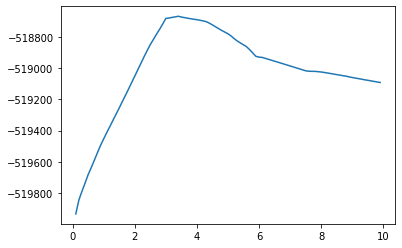

In [10]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [11]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
33,3.4,-518667.020804


In [12]:
lm_l = Lasso(alpha=3.4)
lm_l.fit(X_train,y_train)

Lasso(alpha=3.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
# random forest regressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-439409.0679267175

In [14]:
# tune models GridsearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [15]:
gs.best_score_

-424628.448596368

In [16]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [18]:
mean_absolute_error(y_test,tpred_lm)

518665.89682147815

In [19]:
mean_absolute_error(y_test,tpred_lml)

517629.8075847258

In [20]:
mean_absolute_error(y_test,tpred_rf)

438896.3906352087

In [21]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

462302.2911714954

In [23]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

# list(X_test.iloc[1,:])

974136.3172413793

In [25]:
# list(X_test.iloc[1,:])